In [2]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.keras import Sequential, Input
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
images = []
for i in range(4000):
    images.append(np.array(Image.fromarray(plt.imread(f"./training_set/training_set/cats/cat.{i+1}.jpg")).resize((128, 128)))/255)
for i in range(4000):
    images.append(np.array(Image.fromarray(plt.imread(f"./training_set/training_set/dogs/dog.{i+1}.jpg")).resize((128, 128)))/255)

In [6]:
X_train = np.array(images)

In [7]:
X_train.shape

(8000, 128, 128, 3)

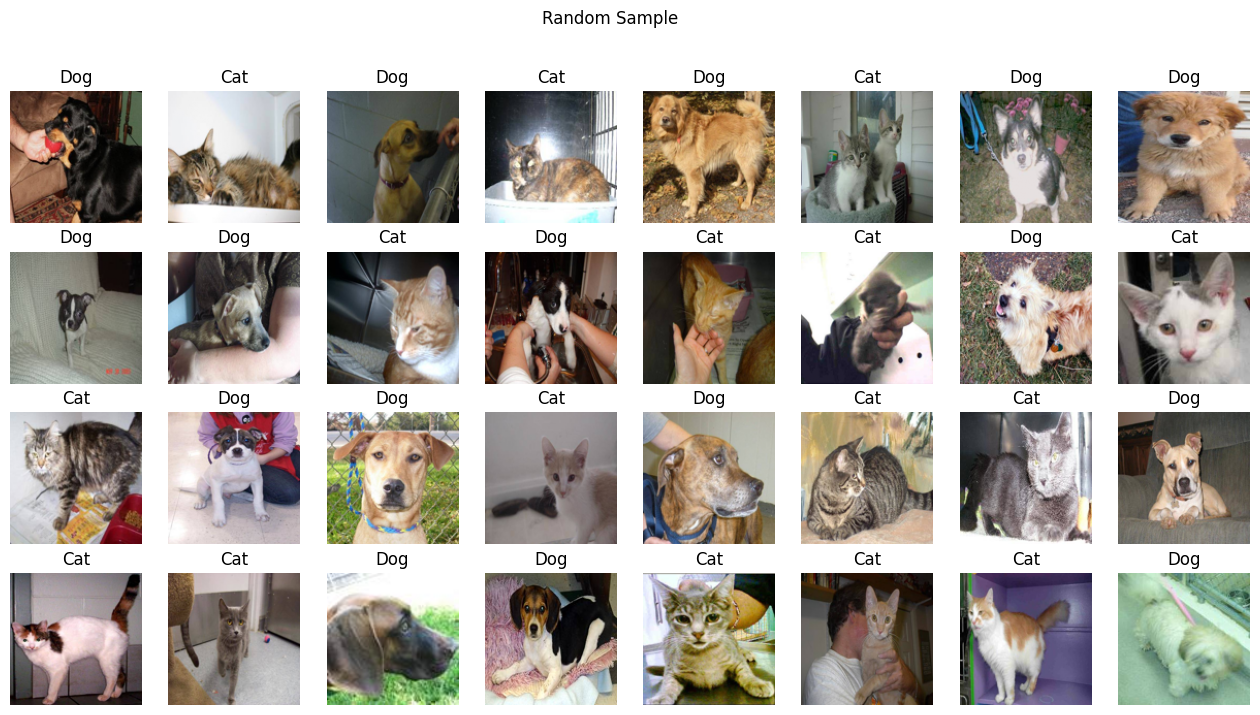

In [9]:
fig, axes = plt.subplots(4, 8, figsize=(16, 8))
fig.suptitle("Random Sample")
i = 0
for ax in axes.flat:
    rand_index = np.random.randint(8000)
    ax.imshow(X_train[rand_index])
    if(rand_index>=4000):
        ax.set_title("Dog")
    else:
        ax.set_title("Cat")
    ax.set_axis_off()
    i+=1

### Cats = 0 & Dogs = 1

In [66]:
y_train = np.ones(8000)
for i in range(4000):
    y_train[i] = 0
y_train = y_train.reshape(-1, 1)

In [19]:
test_images = []
for i in range(4000, 5000):
    test_images.append(np.array(Image.fromarray(plt.imread(f"./test_set/test_set/cats/cat.{i+1}.jpg")).resize((128, 128)))/255)
for i in range(4000, 5000):
    test_images.append(np.array(Image.fromarray(plt.imread(f"./test_set/test_set/dogs/dog.{i+1}.jpg")).resize((128, 128)))/255)

In [20]:
X_test = np.array(test_images)

In [44]:
y_test = np.ones(2000)
for i in range(1000):
    y_test[i] = 0
y_test = y_test.reshape(-1, 1)

In [67]:
SPNModel = Sequential([
    Input(shape=(128, 128, 3)),
    tfl.Conv2D(filters=32, kernel_size=(3, 3)),
    tfl.ReLU(),
    tfl.MaxPool2D(pool_size=(2, 2)),
    tfl.BatchNormalization(axis=3),
    tfl.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1)),
    tfl.ReLU(),
    tfl.MaxPool2D(pool_size=(2, 2)),
    tfl.BatchNormalization(axis=3),

    tfl.Conv2D(filters=64, kernel_size=(3, 3)),
    tfl.ReLU(),
    tfl.MaxPool2D(pool_size=(2, 2)),
    tfl.BatchNormalization(axis=3),

    tfl.Conv2D(filters=64, kernel_size=(3, 3)),
    tfl.ReLU(),
    tfl.MaxPool2D(pool_size=(2, 2)),
    tfl.BatchNormalization(axis=3),

    tfl.Flatten(),

    tfl.Dense(units=128, activation="relu"),
    tfl.Dense(units=1, activation="sigmoid")
])
SPNModel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

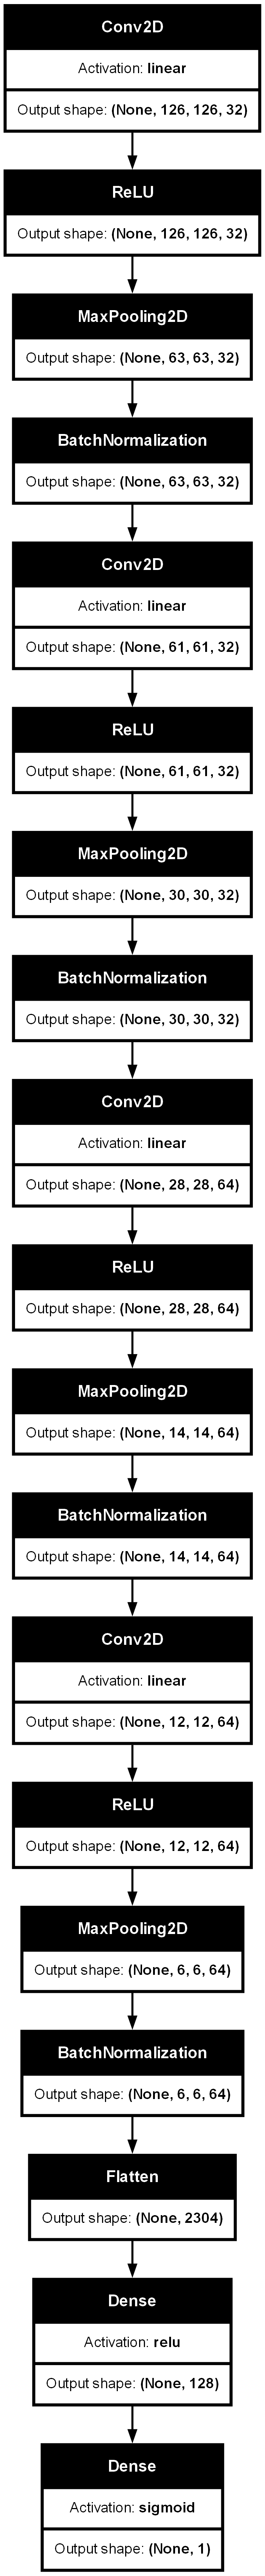

In [159]:
tf.keras.utils.plot_model(SPNModel, show_shapes=True, show_layer_activations=True)

In [68]:
SPNModel.fit(X_train, y_train, epochs=10)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 19s 64ms/step - accuracy: 0.6313 - loss: 0.8179
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 62ms/step - accuracy: 0.7808 - loss: 0.4695
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 62ms/step - accuracy: 0.8462 - loss: 0.3487
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 61ms/step - accuracy: 0.9016 - loss: 0.2500
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 62ms/step - accuracy: 0.9355 - loss: 0.1765
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 63ms/step - accuracy: 0.9553 - loss: 0.1150
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 65ms/step - accuracy: 0.9728 - loss: 0.0767
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 63ms/step - accuracy: 0.9678 - loss: 0.0860
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 63ms/step - accuracy: 0.9778 - loss: 0.0614
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 63ms/step - accuracy: 0.9833 - loss: 0.0423


In [70]:
SPNModel.evaluate(X_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7589 - loss: 1.0143


[0.948915421962738, 0.7764999866485596]

In [75]:
SPNModel.save("SPNClassifier.keras")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


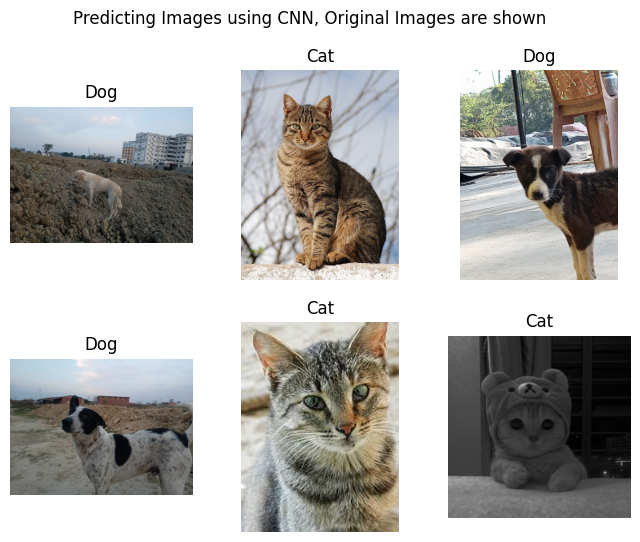

In [155]:
fig, axes = plt.subplots(2, 3, figsize=(8, 6))
i = 1
fig.suptitle("Predicting Images using CNN, Original Images are shown")
for ax in axes.flat:
    test_img_unprocessed = plt.imread(f"./test_images/test{i}.jpg")
    test_img = np.array(Image.fromarray(test_img_unprocessed).resize((128, 128)))/255
    ax.set_title("Dog" if SPNModel.predict(test_img.reshape(1, 128, 128, 3)) >= 0.5 else "Cat")
    ax.imshow(test_img_unprocessed)
    ax.set_axis_off()
    i += 1
fig.savefig("./result.jpg", dpi=200)